## 観測ロケットMOMO初号機、2号機、地上燃焼試験の履歴比較

統合燃焼実験　SFT40-42

* SFT40　2018/04/19 GGG、MCC共に着火、MCC着火前のデータロスト、サンプリング周波数(Hz):5000
* SFT41　2018/06/08 EA冷やし、フェイスプレートも冷やし　GGG着火、MCC着火せず　フルデータ取得、サンプリング周波数(Hz):10000
* SFT42　2018/06/12 EAのみ冷やし　GGG着火、MCC着火せず　フルデータ取得、サンプリング周波数(Hz):10000

SFT41は点火器が点いてない
→供試体に燃料予冷用のLN2を流していたため点火器が冷やされてパラフィン不着火

SFT42は点火器が点いたがMCC不点火
→燃料予冷ラインを変更して点火器は冷やされない。

In [2]:
import numpy as np
from numpy import pi, deg2rad, rad2deg, sin, cos
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["savefig.dpi"] = 300
%config InlineBackend.figure_format = 'retina'


In [32]:
# ファイル読み込み
col = [x for x in range(1,152)]
df1 = pd.read_csv("../telemetry_csv/5GHz/5g_pc1_totallog.csv", names = col, index_col = False)
time1  = df1[1]

savename = "../telemetry_plot/Cband_telemetry/MOMO2_1_compare_"

source_txt = "(Source: C band Telemetry)"

df_030 = pd.read_csv("../MOMO1_telemetry_csv/telem3/telem3_030.csv")
df_031 = pd.read_csv("../MOMO1_telemetry_csv/telem3/telem3_031.csv")
df_032 = pd.read_csv("../MOMO1_telemetry_csv/telem3/telem3_032.csv")
df_033 = pd.read_csv("../MOMO1_telemetry_csv/telem3/telem3_033.csv")

#以下ファイルパスをグラフを出力したいEDXのCSVファイルにする
name_SFT40 = ["Time","PTP","PFT","POT","PFFL","PFL","POFL","PFTI","POTI","PFM","PFI","POI","Pc","GGG_PFFL","GGG_PFL","GGG_Pc","POL","V_TRG","V_TRG","TFL","TOL","TIG1","TIG2","TOLW","TOD","GGG_TIG","GGG_Tc","DI1","DI2"
]
name_SFT41 = ["Time","PTP","PFT","PFTI","POT","PFFL","PFL","POFL","POL","PFM","POI","Pc","GGG_Pc","POTI","V_TRG","TFT","TFI","TOI","GGG_Tc","GGG_TIG","TIG1","TIG2"
]
name_SFT42 = ["Time","PTP","PFT","PFTI","POT","PFFL","PFL","POFL","POL","PFM","POI","Pc","GGG_Pc","POTI","V_TRG","TFT","TFI","TOI","GGG_Tc","GGG_TIG","TIG1","TIG2"
]
df_SFT40 =pd.read_csv("../SFT_analysis/PT12k_SFT40.CSV",index_col=False,encoding='shift-jis',skiprows=14, names=name_SFT40)
df_SFT41 = pd.read_csv("../SFT_analysis/PT12k_SFT41.CSV",index_col=False,encoding='shift-jis',skiprows=14, names=name_SFT41)
df_SFT42 = pd.read_csv("../SFT_analysis/PT12k_SFT42.CSV",index_col=False,encoding='shift-jis',skiprows=14, names=name_SFT42)


/Users/ina111/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


### MOMO初号機とMOMO2号機の比較

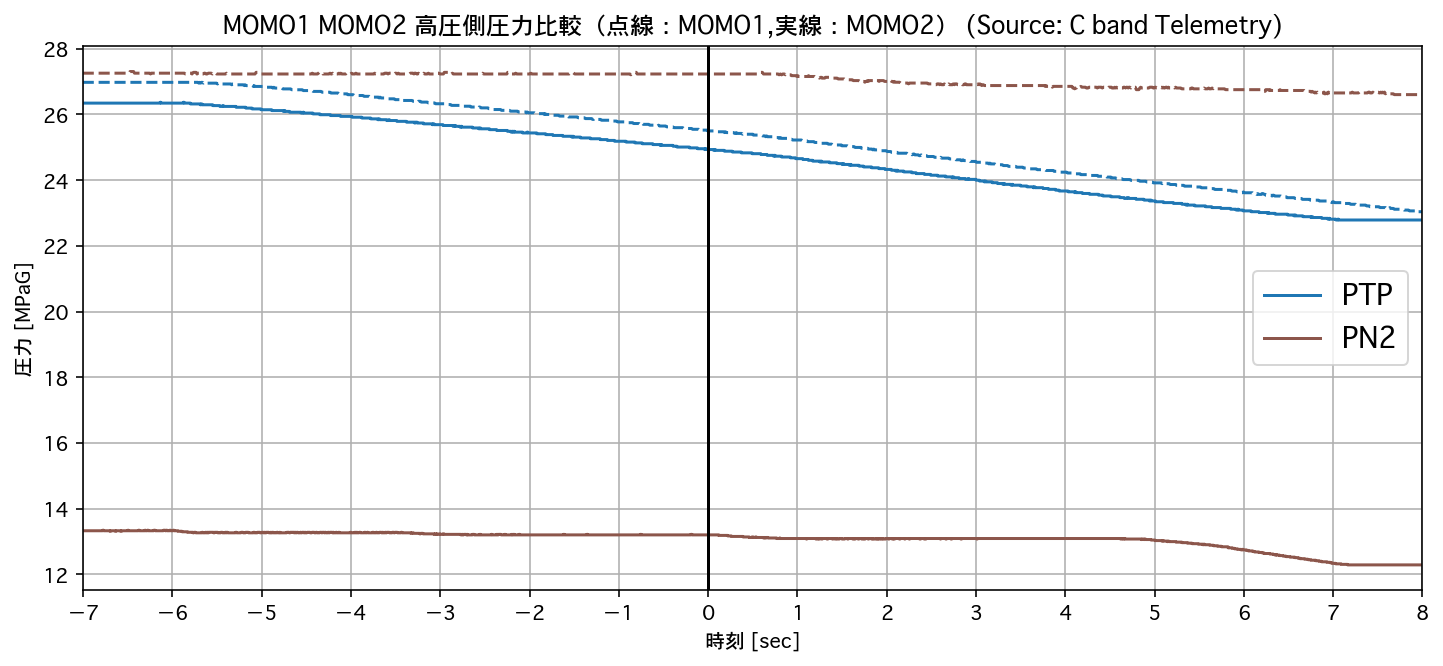

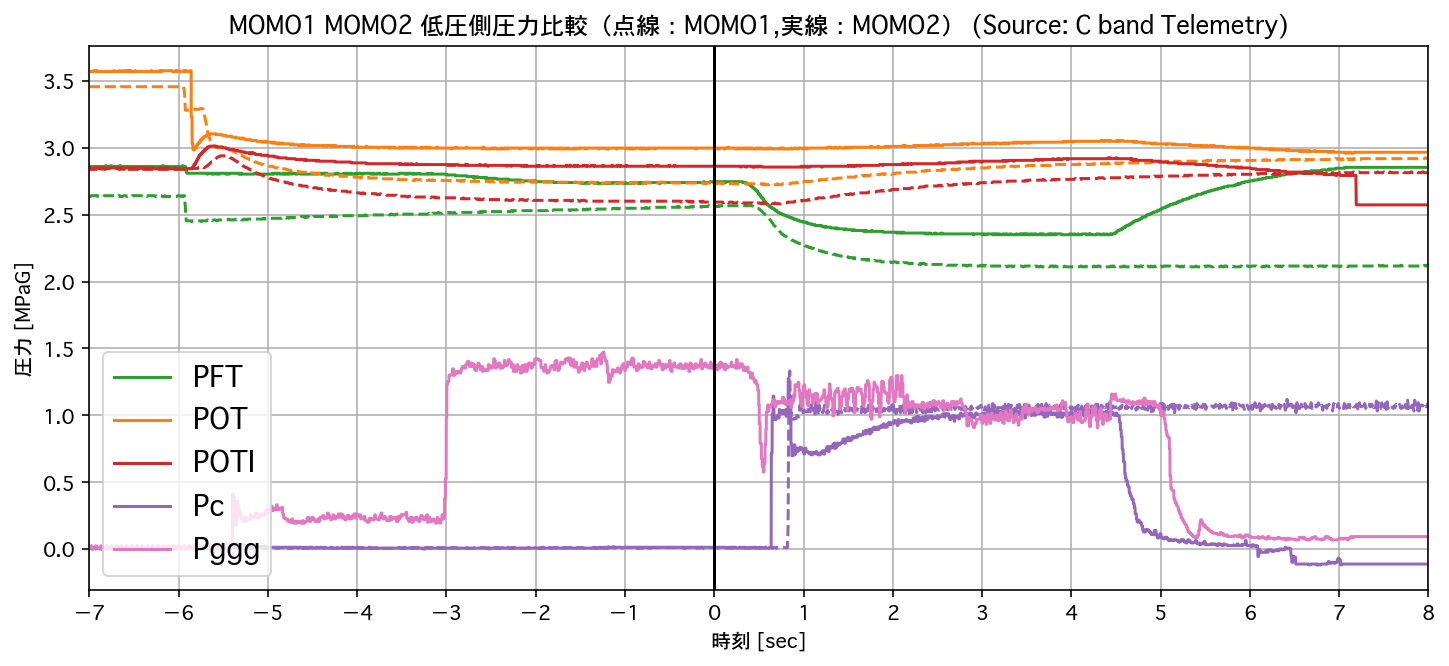

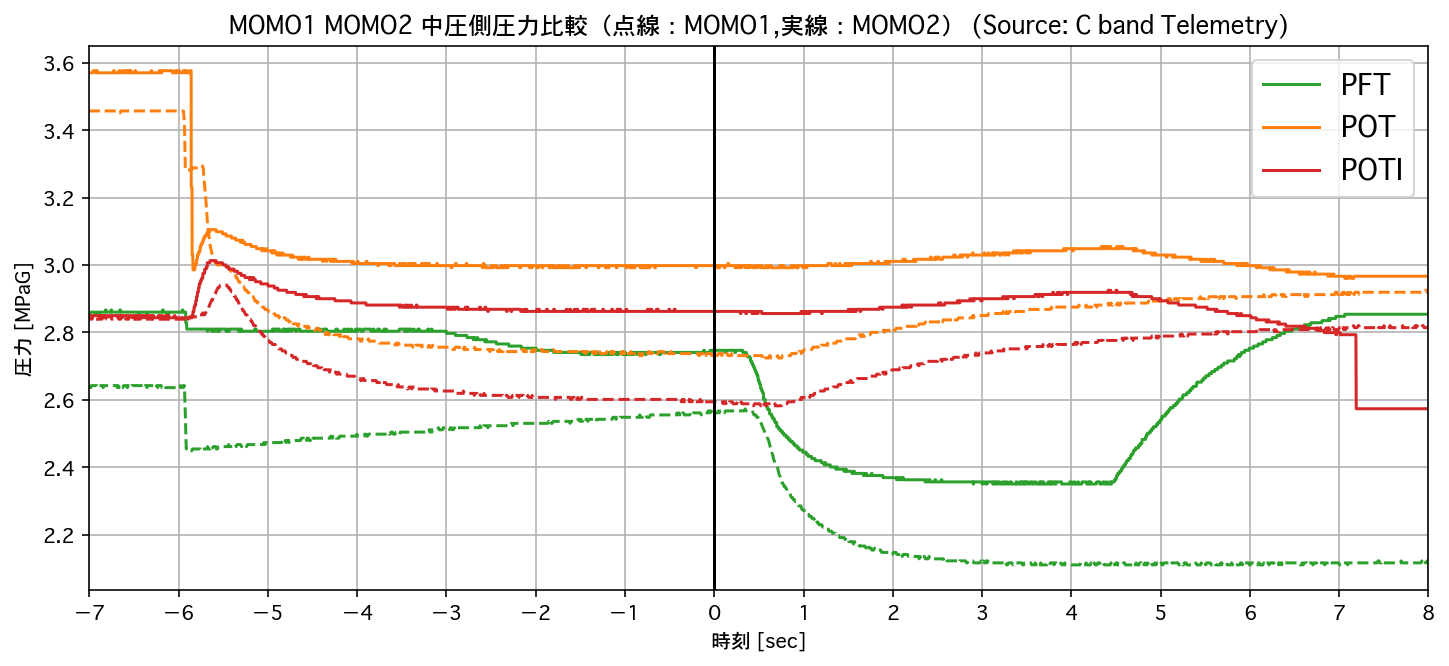

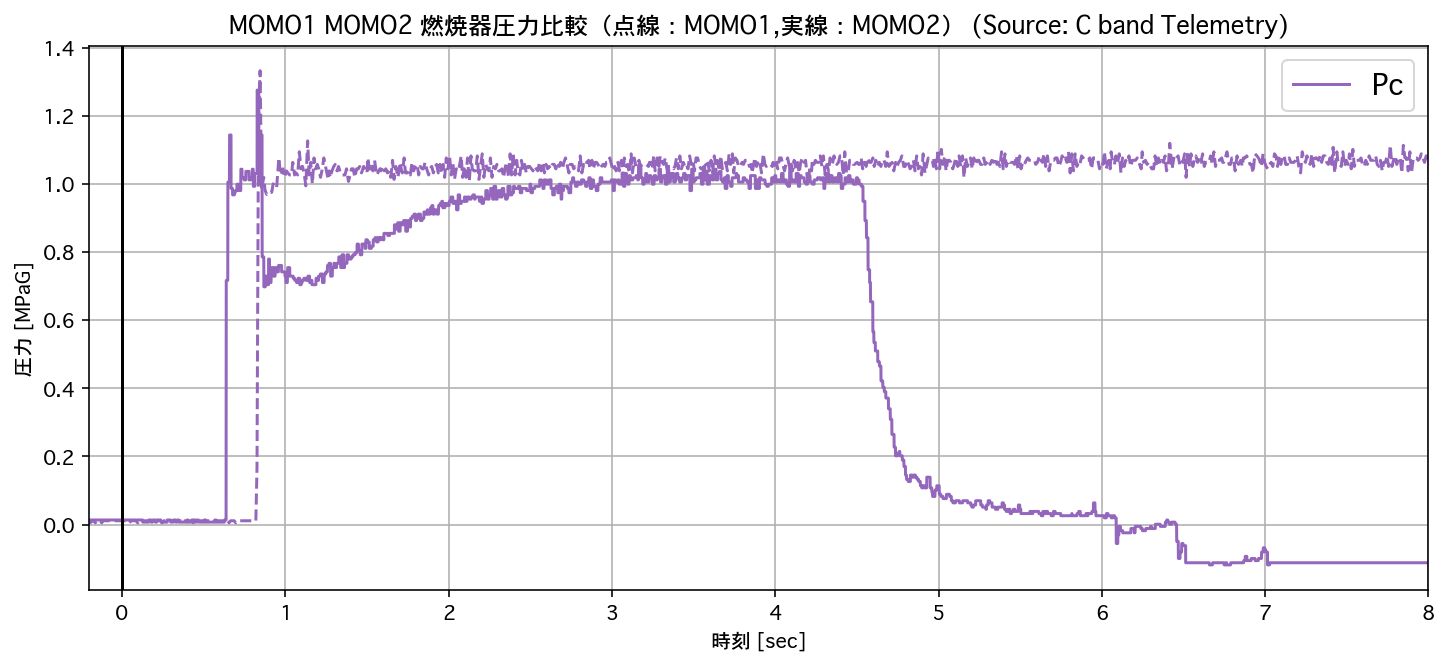

In [49]:
alpha = 1.0
plt.figure()
plt.plot(df_032["# T[s]"], df_032["P0[MPa]"], "C0--", alpha=alpha, label="")
plt.plot(df1[1], df1[34], "-", color="C0", alpha=alpha, label="PTP")
plt.plot(df_033["# T[s]"], df_033["P5[MPa]"], "C5--", alpha=alpha, label="")
plt.plot(df1[1], df1[39], "-", color="C5", alpha=alpha, label="PN2")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 MOMO2 高圧側圧力比較（点線：MOMO1,実線：MOMO2） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-20,9,1))
plt.xlim([-7, 8])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_high" + ".png")

alpha = 1.0
plt.figure()
plt.plot(df_032["# T[s]"], df_032["P1[MPa]"], "C2--", alpha=alpha, label="")
plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="PFT")
plt.plot(df_032["# T[s]"], df_032["P2[MPa]"], "C1--", alpha=alpha, label="")
plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="POT")
plt.plot(df_031["# T[s]"], df_031["P3[MPa]"], "C3--", alpha=alpha, label="")
plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="POTI")
plt.plot(df_030["# T[s]"], df_030["P4[MPa]"], "C4--", alpha=alpha, label="")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="Pc")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="Pggg")
plt.grid()
plt.legend(fontsize=14, loc="lower left")
plt.title("MOMO1 MOMO2 低圧側圧力比較（点線：MOMO1,実線：MOMO2） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_low" + ".png")

alpha = 1.0
plt.figure()
plt.plot(df_032["# T[s]"], df_032["P1[MPa]"], "C2--", alpha=alpha, label="")
plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="PFT")
plt.plot(df_032["# T[s]"], df_032["P2[MPa]"], "C1--", alpha=alpha, label="")
plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="POT")
plt.plot(df_031["# T[s]"], df_031["P3[MPa]"], "C3--", alpha=alpha, label="")
plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="POTI")
plt.grid()
plt.legend(fontsize=14, loc="upper right")
plt.title("MOMO1 MOMO2 中圧側圧力比較（点線：MOMO1,実線：MOMO2） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_middle" + ".png")


alpha = 1.0
plt.figure()
plt.plot(df_030["# T[s]"], df_030["P4[MPa]"], "C4--", alpha=alpha, label="")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="Pc")
plt.grid()
plt.legend(fontsize=14, loc="upper right")
plt.title("MOMO1 MOMO2 燃焼器圧力比較（点線：MOMO1,実線：MOMO2） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-0.2, 8])
# plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_combusition" + ".png")


## 地上燃焼試験の結果について

Index(['Time', 'PTP', 'PFT', 'POT', 'PFFL', 'PFL', 'POFL', 'PFTI', 'POTI',
       'PFM', 'PFI', 'POI', 'Pc', 'GGG_PFFL', 'GGG_PFL', 'GGG_Pc', 'POL',
       'V_TRG', 'V_TRG.1', 'TFL', 'TOL', 'TIG1', 'TIG2', 'TOLW', 'TOD',
       'GGG_TIG', 'GGG_Tc', 'DI1', 'DI2'],
      dtype='object')

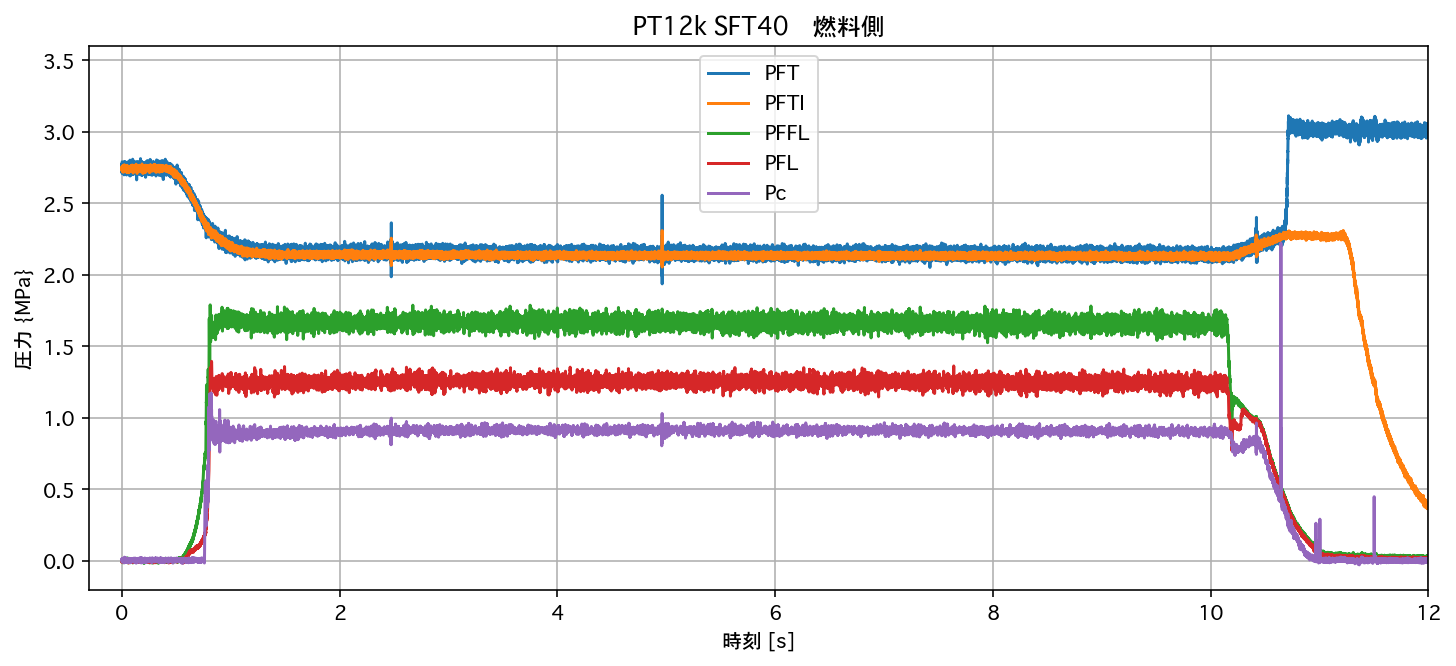

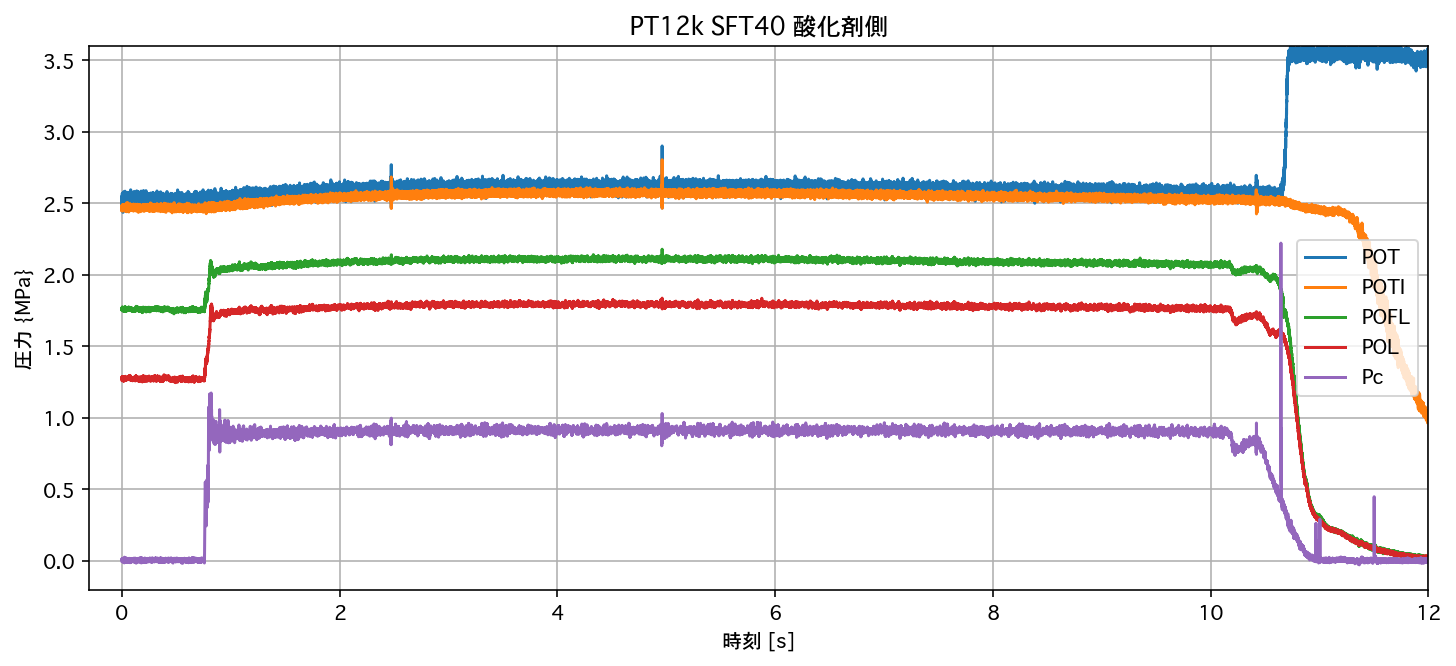

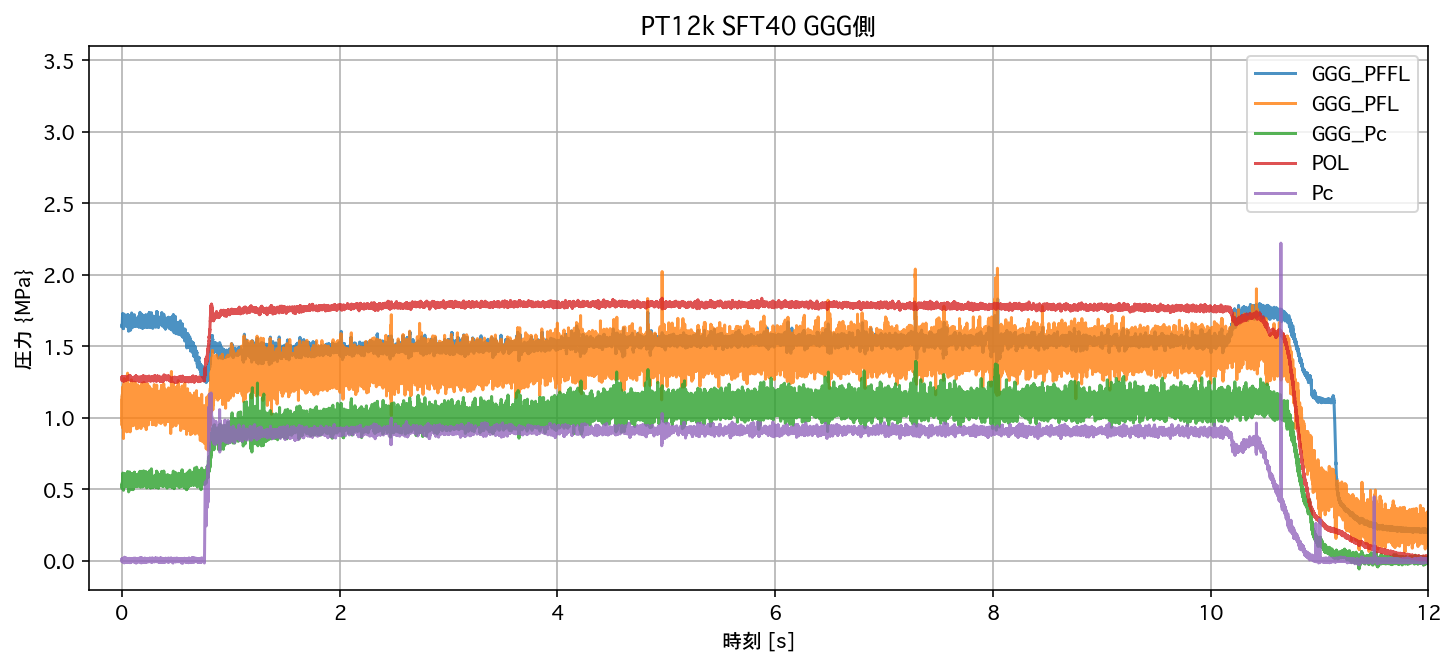

In [94]:
savename_SFT = "../SFT_analysis/output/SFT_"

plt.figure()
plt.plot(df_SFT40["Time"], df_SFT40["PFT"])
plt.plot(df_SFT40["Time"], df_SFT40["PFTI"])
plt.plot(df_SFT40["Time"], df_SFT40["PFFL"])
plt.plot(df_SFT40["Time"], df_SFT40["PFL"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFM"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFI"])
plt.plot(df_SFT40["Time"], df_SFT40["Pc"])
plt.grid()
plt.xlabel("時刻 [s]")
plt.ylabel("圧力 {MPa}")
plt.title("PT12k SFT40　燃料側")
plt.legend()
plt.xlim([-0.3, 12])
plt.ylim([-0.2, 3.6])

plt.figure()
plt.plot(df_SFT40["Time"], df_SFT40["POT"])
plt.plot(df_SFT40["Time"], df_SFT40["POTI"])
plt.plot(df_SFT40["Time"], df_SFT40["POFL"])
plt.plot(df_SFT40["Time"], df_SFT40["POL"])
plt.plot(df_SFT40["Time"], df_SFT40["Pc"])
plt.grid()
plt.xlabel("時刻 [s]")
plt.ylabel("圧力 {MPa}")
plt.title("PT12k SFT40 酸化剤側")
plt.legend()
plt.xlim([-0.3, 12])
plt.ylim([-0.2, 3.6])

a = 0.8
plt.figure()
plt.plot(df_SFT40["Time"], df_SFT40["GGG_PFFL"], alpha=a)
plt.plot(df_SFT40["Time"], df_SFT40["GGG_PFL"], alpha=a)
plt.plot(df_SFT40["Time"], df_SFT40["GGG_Pc"], alpha=a)
plt.plot(df_SFT40["Time"], df_SFT40["POL"], alpha=a)
plt.plot(df_SFT40["Time"], df_SFT40["Pc"], alpha=a)
plt.grid()
plt.xlabel("時刻 [s]")
plt.ylabel("圧力 {MPa}")
plt.title("PT12k SFT40 GGG側")
plt.legend()
plt.xlim([-0.3, 12])
plt.ylim([-0.2, 3.6])




# plt.figure()
# plt.plot(df_SFT42["Time"], df_SFT42["PFT"])
# plt.plot(df_SFT42["Time"], df_SFT42["POT"])
# # plt.plot(df_SFT40["Time"], df_SFT40["PFFL"])
# # plt.plot(df_SFT40["Time"], df_SFT40["PFL"])
# # plt.plot(df_SFT40["Time"], df_SFT40["POFL"])
# # plt.plot(df_SFT40["Time"], df_SFT40["PFTI"])
# plt.plot(df_SFT42["Time"], df_SFT42["POTI"])
# # plt.plot(df_SFT40["Time"], df_SFT40["PFM"])
# # plt.plot(df_SFT40["Time"], df_SFT40["PFI"])
# # plt.plot(df_SFT40["Time"], df_SFT40["POI"])
# plt.plot(df_SFT42["Time"], df_SFT42["Pc"])
# # plt.plot(df_SFT40["Time"], df_SFT40["PFM"])
# plt.grid()
# plt.xlabel("時刻 [s]")
# plt.ylabel("圧力 {MPa}")
# plt.title("PT12k SFT42")
# plt.legend()
# plt.xlim([-0.2, 20])
# plt.ylim([-0.2, 3.5])

# df_SFT40.keys()


df_SFT40.keys()


Index(['Time', 'PTP', 'PFT', 'POT', 'PFFL', 'PFL', 'POFL', 'PFTI', 'POTI',
       'PFM', 'PFI', 'POI', 'Pc', 'GGG_PFFL', 'GGG_PFL', 'GGG_Pc', 'POL',
       'V_TRG', 'V_TRG.1', 'TFL', 'TOL', 'TIG1', 'TIG2', 'TOLW', 'TOD',
       'GGG_TIG', 'GGG_Tc', 'DI1', 'DI2'],
      dtype='object')

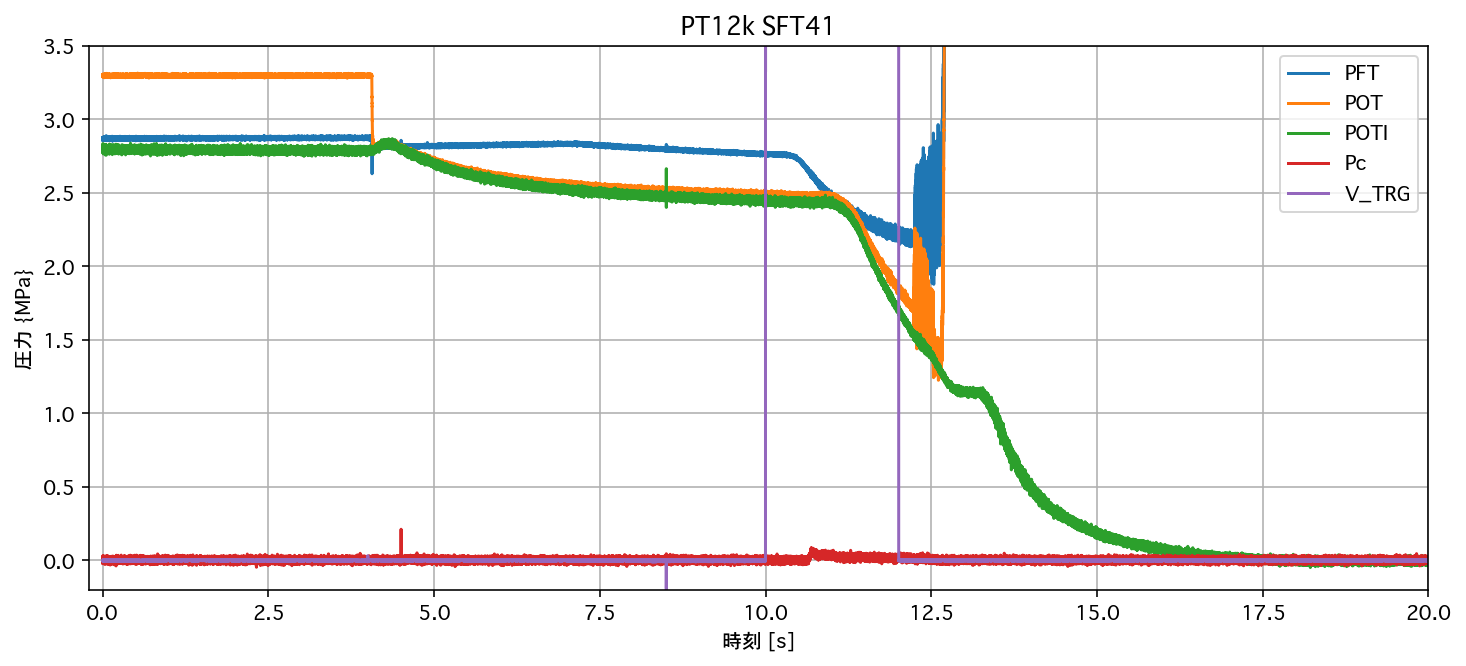

In [91]:
plt.figure()
plt.plot(df_SFT41["Time"], df_SFT41["PFT"])
plt.plot(df_SFT41["Time"], df_SFT41["POT"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFFL"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFL"])
# plt.plot(df_SFT40["Time"], df_SFT40["POFL"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFTI"])
plt.plot(df_SFT41["Time"], df_SFT41["POTI"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFM"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFI"])
# plt.plot(df_SFT40["Time"], df_SFT40["POI"])
plt.plot(df_SFT41["Time"], df_SFT41["Pc"])
plt.plot(df_SFT41["Time"], df_SFT41["V_TRG"])
# plt.plot(df_SFT40["Time"], df_SFT40["PFM"])
plt.grid()
plt.xlabel("時刻 [s]")
plt.ylabel("圧力 {MPa}")
plt.title("PT12k SFT41")
plt.legend()
plt.xlim([-0.2, 20])
plt.ylim([-0.2, 3.5])

df_SFT40.keys()

## MOMO２号機とGGG比較

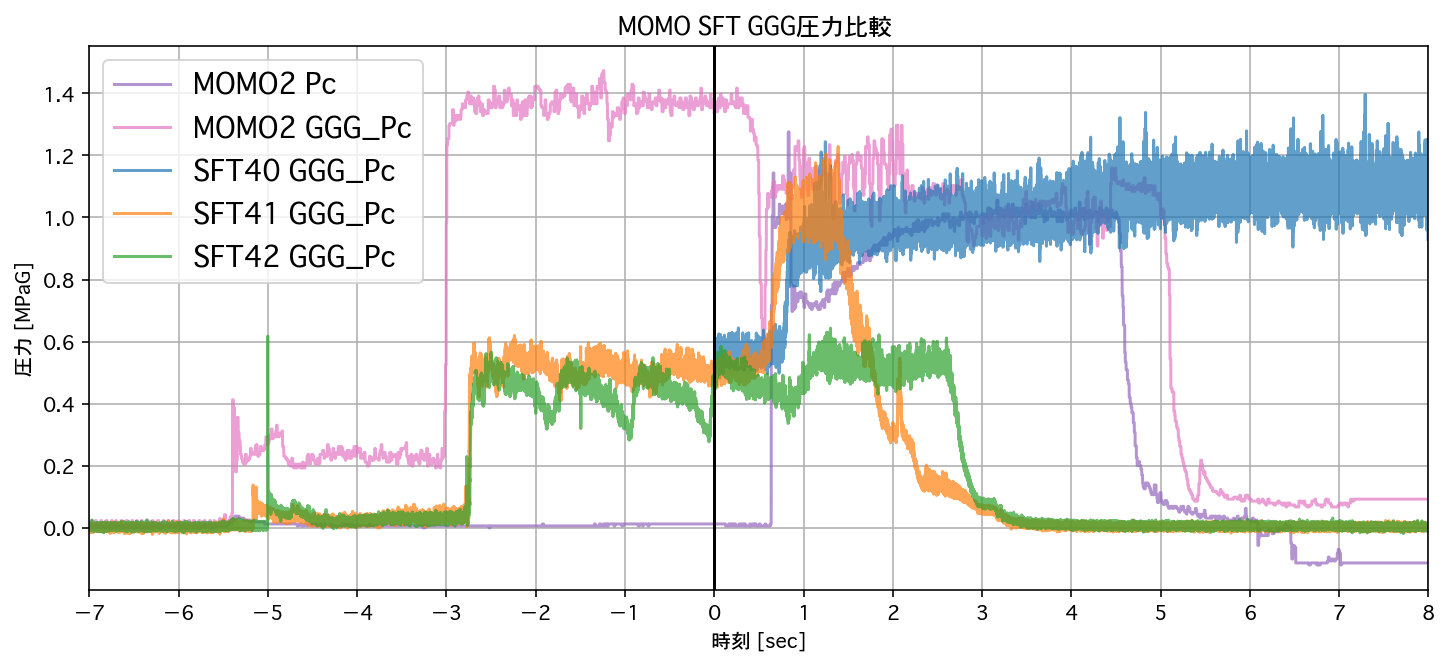

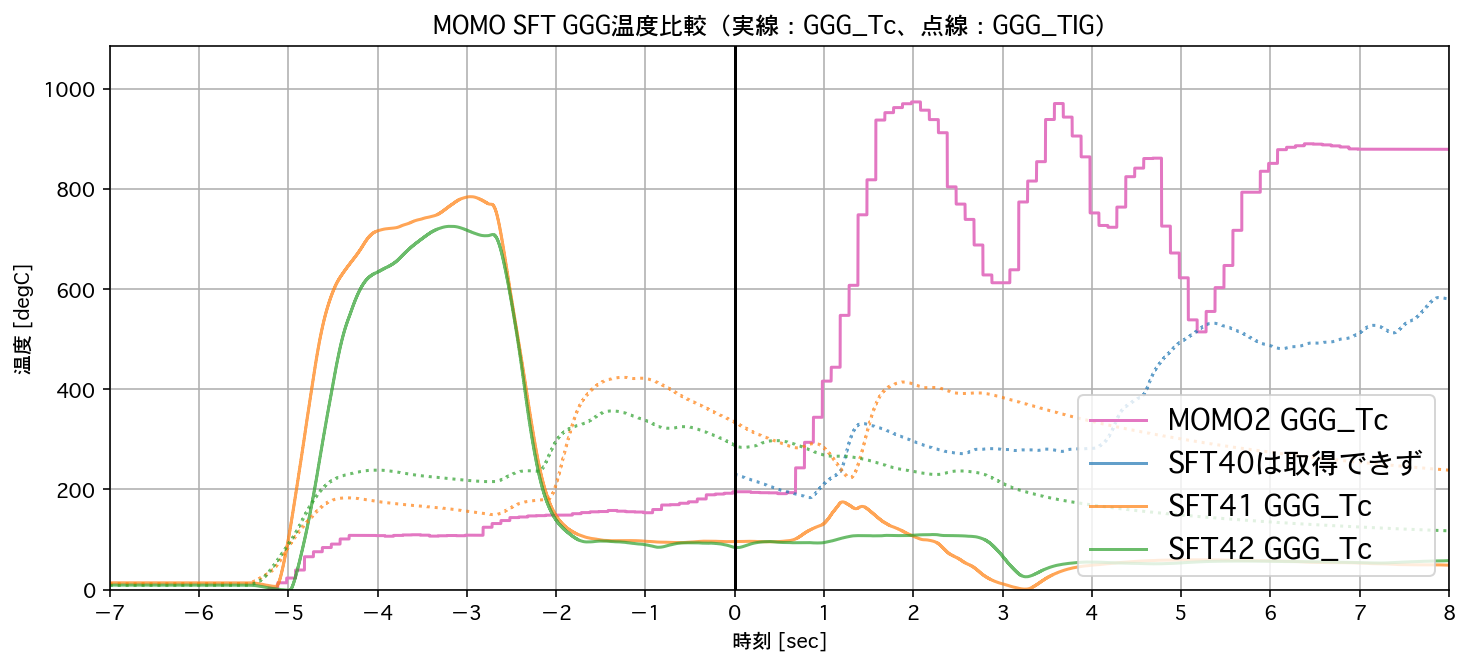

In [138]:
alpha = 0.7
plt.figure()
# plt.plot(df_032["# T[s]"], df_032["P1[MPa]"], "C2--", alpha=alpha, label="")
# plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="PFT")
# plt.plot(df_032["# T[s]"], df_032["P2[MPa]"], "C1--", alpha=alpha, label="")
# plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="POT")
# plt.plot(df_031["# T[s]"], df_031["P3[MPa]"], "C3--", alpha=alpha, label="")
# plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="POTI")
# plt.plot(df_030["# T[s]"], df_030["P4[MPa]"], "C4--", alpha=alpha, label="")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="MOMO2 Pc")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="MOMO2 GGG_Pc")
# plt.plot(df_SFT40["Time"], df_SFT40["GGG_PFFL"], "C7.", alpha=alpha)
# plt.plot(df_SFT40["Time"], df_SFT40["GGG_PFL"], "C8.", alpha=alpha)
plt.plot(df_SFT40["Time"], df_SFT40["GGG_Pc"], "C0-", alpha=alpha, label="SFT40 GGG_Pc")
plt.plot(df_SFT41["Time"]-10, df_SFT41["GGG_Pc"], "C1-", alpha=alpha, label="SFT41 GGG_Pc")
plt.plot(df_SFT42["Time"]-10, df_SFT42["GGG_Pc"], "C2-", alpha=alpha, label="SFT42 GGG_Pc")
# plt.plot(df_SFT41["Time"]-10, df_SFT41["V_TRG"])
plt.grid()
plt.legend(fontsize=14, loc="upper left")
plt.title("MOMO SFT GGG圧力比較 ")
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
# plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "GGG_pressure_compare" + ".png")


alpha = 0.7
plt.figure()
plt.plot(df1[1], df1[43], "C6-", label="MOMO2 GGG_Tc")
plt.plot(df_SFT40["Time"], df_SFT40["GGG_Tc"], "C0-", alpha=alpha, label="SFT40は取得できず")
plt.plot(df_SFT41["Time"]-10, df_SFT41["GGG_Tc"], "C1-", alpha=alpha, label="SFT41 GGG_Tc")
plt.plot(df_SFT42["Time"]-10, df_SFT42["GGG_Tc"], "C2-", alpha=alpha, label="SFT42 GGG_Tc")
plt.plot(df_SFT40["Time"], df_SFT40["GGG_TIG"], "C0:", alpha=alpha, label="")
plt.plot(df_SFT41["Time"]-10, df_SFT41["GGG_TIG"], "C1:", alpha=alpha, label="")
plt.plot(df_SFT42["Time"]-10, df_SFT42["GGG_TIG"], "C2:", alpha=alpha, label="")
# plt.plot(df_SFT41["Time"]-10, df_SFT41["V_TRG"])
plt.grid()
plt.legend(fontsize=14, loc="lower right")
plt.title("MOMO SFT GGG温度比較（実線：GGG_Tc、点線：GGG_TIG） ")
plt.xlabel("時刻 [sec]")
plt.ylabel("温度 [degC]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "GGG_temp_compare" + ".png")


## 点火器

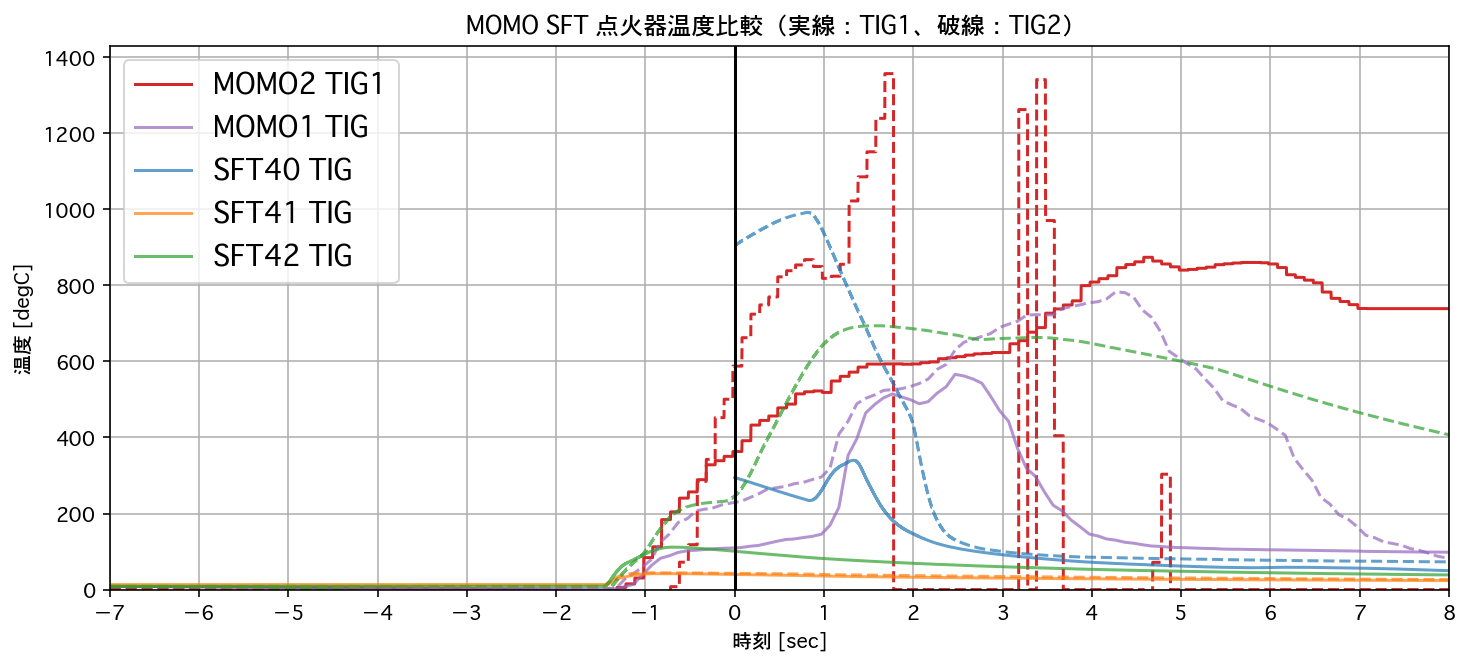

In [139]:
alpha = 0.7
plt.figure()
plt.plot(df1[1], df1[41], "C3-", label="MOMO2 TIG1")
plt.plot(df1[1], df1[42], "C3--", label="")
plt.plot(df_041["# T[s]"], df_041["T4[C]"], "C4-", alpha=alpha, label="MOMO1 TIG")
plt.plot(df_041["# T[s]"], df_041["T5[C]"], "C4--", alpha=alpha, label="")
plt.plot(df_SFT40["Time"], df_SFT40["TIG1"], "C0-", alpha=alpha, label="SFT40 TIG")
plt.plot(df_SFT40["Time"], df_SFT40["TIG2"], "C0--", alpha=alpha, label="")
plt.plot(df_SFT41["Time"]-10, df_SFT41["TIG1"], "C1-", alpha=alpha, label="SFT41 TIG")
plt.plot(df_SFT41["Time"]-10, df_SFT41["TIG2"], "C1--", alpha=alpha, label="")
plt.plot(df_SFT42["Time"]-10, df_SFT42["TIG1"], "C2-", alpha=alpha, label="SFT42 TIG")
plt.plot(df_SFT42["Time"]-10, df_SFT42["TIG2"], "C2--", alpha=alpha, label="")
# plt.plot(df_SFT41["Time"]-10, df_SFT41["V_TRG"])
plt.grid()
plt.legend(fontsize=14, loc="upper left")
plt.title("MOMO SFT 点火器温度比較（実線：TIG1、破線：TIG2） ")
plt.xlabel("時刻 [sec]")
plt.ylabel("温度 [degC]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
plt.ylim(ymin=0)
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "IG_temp_compare" + ".png")


## 加圧ライン

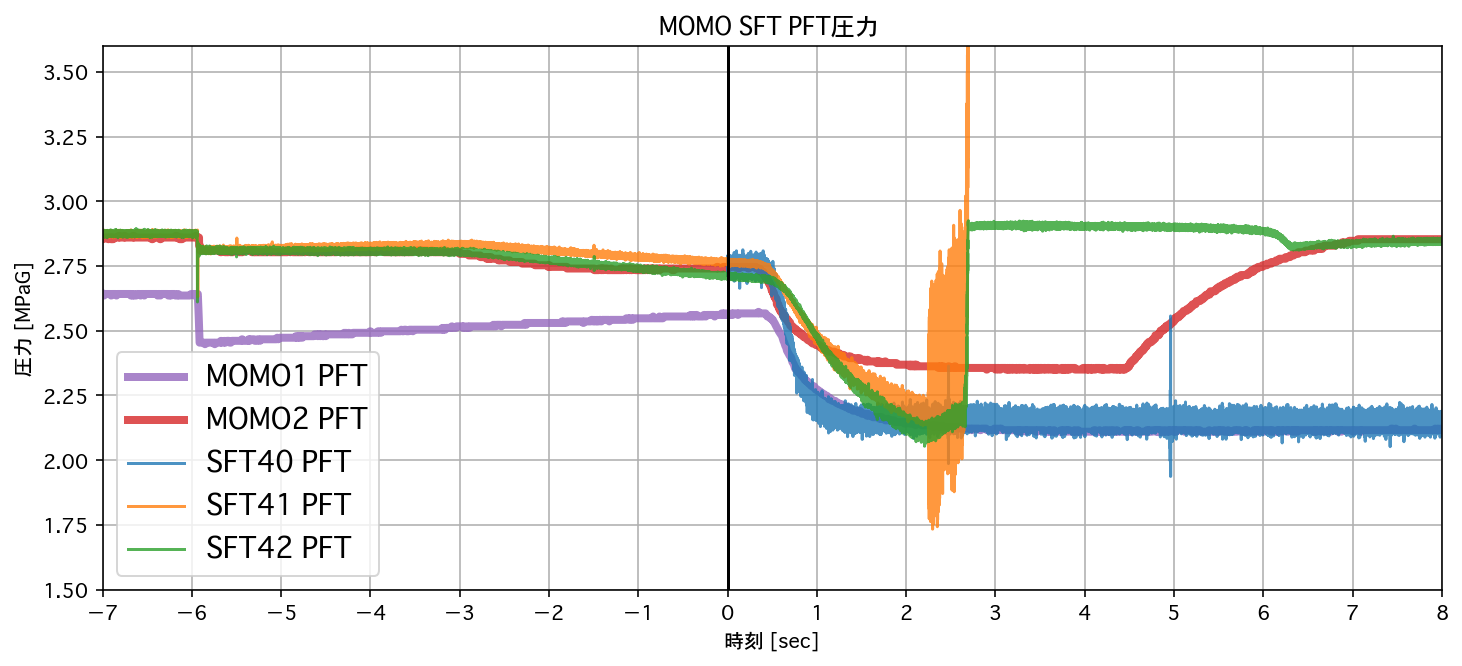

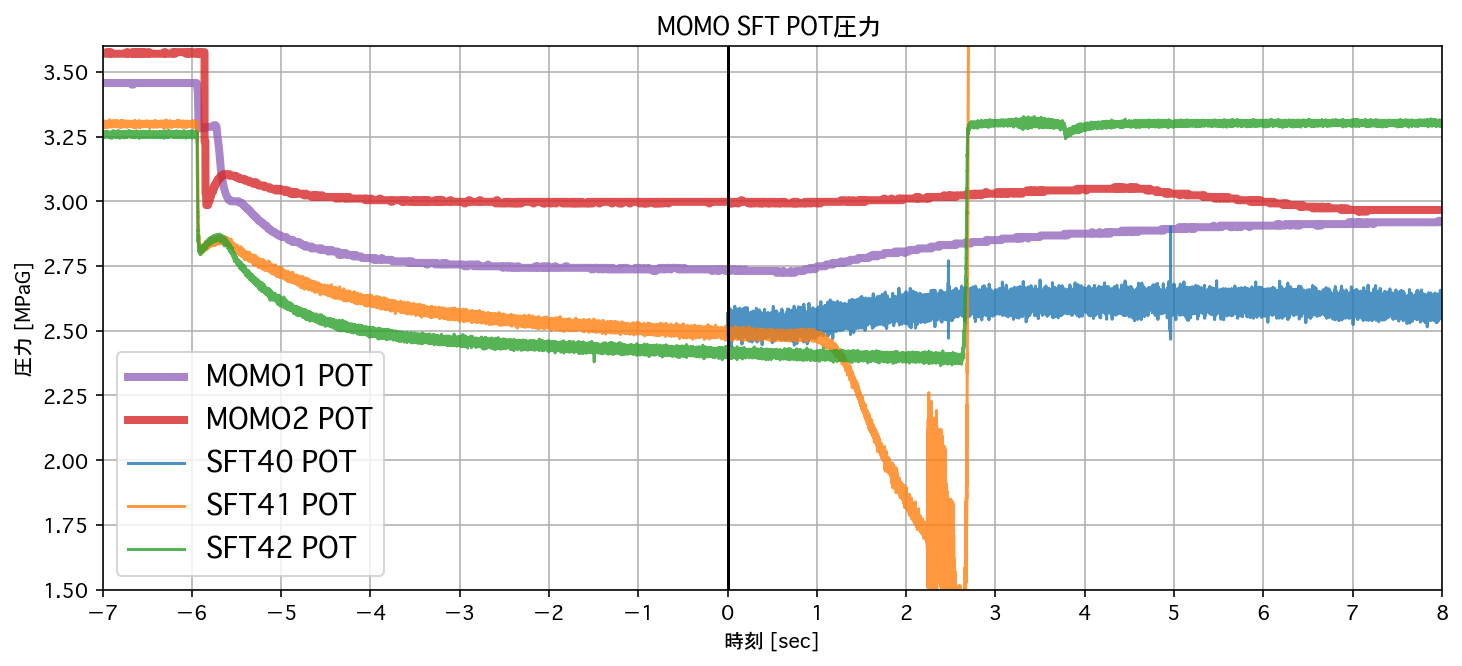

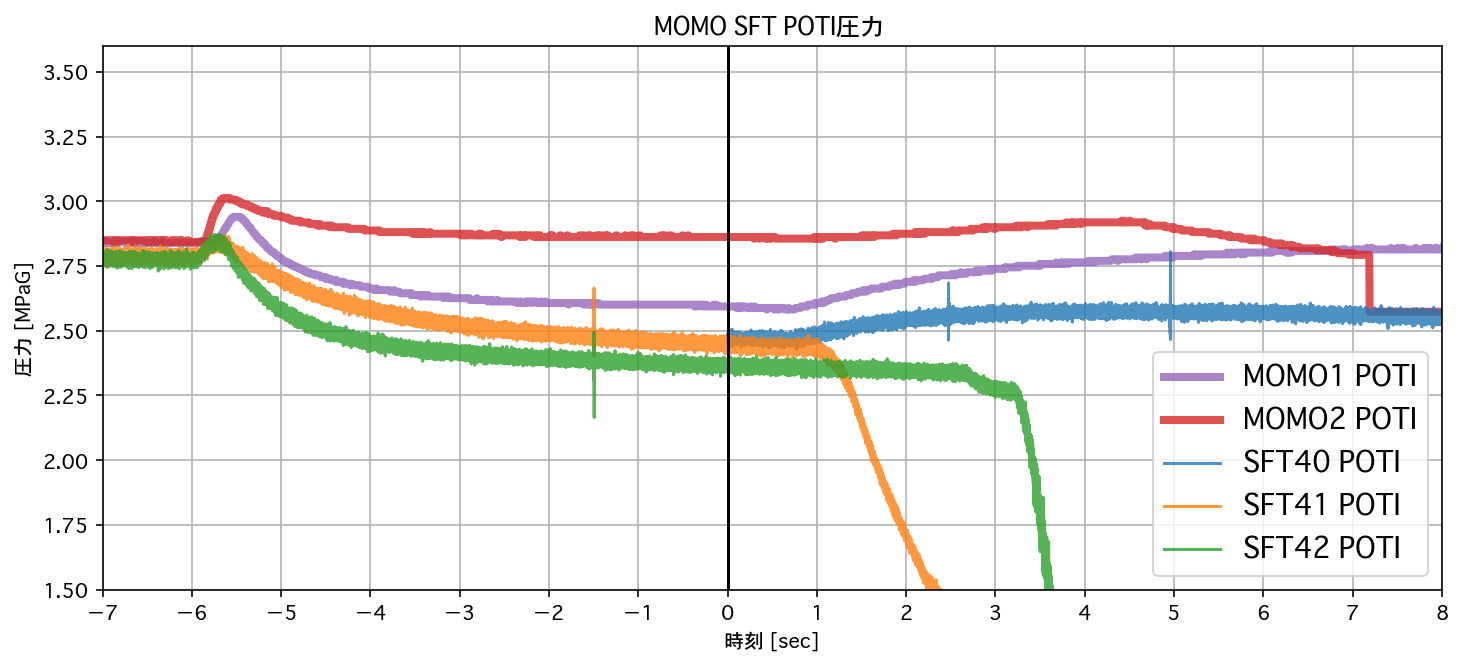

In [142]:
alpha = 0.8
plt.figure()
plt.plot(df_032["# T[s]"], df_032["P1[MPa]"], "C4-", linewidth=4, alpha=alpha, label="MOMO1 PFT")
plt.plot(df1[1], df1[36], "-", color="C3", linewidth=4, alpha=alpha, label="MOMO2 PFT")
# plt.plot(df_032["# T[s]"], df_032["P2[MPa]"], "C1--", alpha=alpha, label="")
# plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="POT")
# plt.plot(df_031["# T[s]"], df_031["P3[MPa]"], "C3--", alpha=alpha, label="")
# plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="POTI")
plt.plot(df_SFT40["Time"], df_SFT40["PFT"], "C0-", alpha=alpha, label="SFT40 PFT")
plt.plot(df_SFT41["Time"]-10, df_SFT41["PFT"], "C1-", alpha=alpha, label="SFT41 PFT")
plt.plot(df_SFT42["Time"]-10, df_SFT42["PFT"], "C2-", alpha=alpha, label="SFT42 PFT")
plt.grid()
plt.legend(fontsize=14, loc="best")
plt.title("MOMO SFT PFT圧力 ")
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
plt.ylim([1.5,3.6])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "PFT_compare" + ".png")


alpha = 0.8
plt.figure()
plt.plot(df_032["# T[s]"], df_032["P2[MPa]"], "C4-", linewidth=4, alpha=alpha, label="MOMO1 POT")
plt.plot(df1[1], df1[35], "-", color="C3", linewidth=4, alpha=alpha, label="MOMO2 POT")
plt.plot(df_SFT40["Time"], df_SFT40["POT"], "C0-", alpha=alpha, label="SFT40 POT")
plt.plot(df_SFT41["Time"]-10, df_SFT41["POT"], "C1-", alpha=alpha, label="SFT41 POT")
plt.plot(df_SFT42["Time"]-10, df_SFT42["POT"], "C2-", alpha=alpha, label="SFT42 POT")
plt.grid()
plt.legend(fontsize=14, loc="best")
plt.title("MOMO SFT POT圧力 ")
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
plt.ylim([1.5,3.6])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "POT_compare" + ".png")


alpha = 0.8
plt.figure()
plt.plot(df_031["# T[s]"], df_031["P3[MPa]"], "C4-", linewidth=4, alpha=alpha, label="MOMO1 POTI")
plt.plot(df1[1], df1[37], "-", color="C3", linewidth=4, alpha=alpha, label="MOMO2 POTI")
plt.plot(df_SFT40["Time"], df_SFT40["POTI"], "C0-", alpha=alpha, label="SFT40 POTI")
plt.plot(df_SFT41["Time"]-10, df_SFT41["POTI"], "C1-", alpha=alpha, label="SFT41 POTI")
plt.plot(df_SFT42["Time"]-10, df_SFT42["POTI"], "C2-", alpha=alpha, label="SFT42 POTI")
plt.grid()
plt.legend(fontsize=14, loc="best")
plt.title("MOMO SFT POTI圧力 ")
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
plt.ylim([1.5,3.6])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "POTI_compare" + ".png")


## 燃焼室

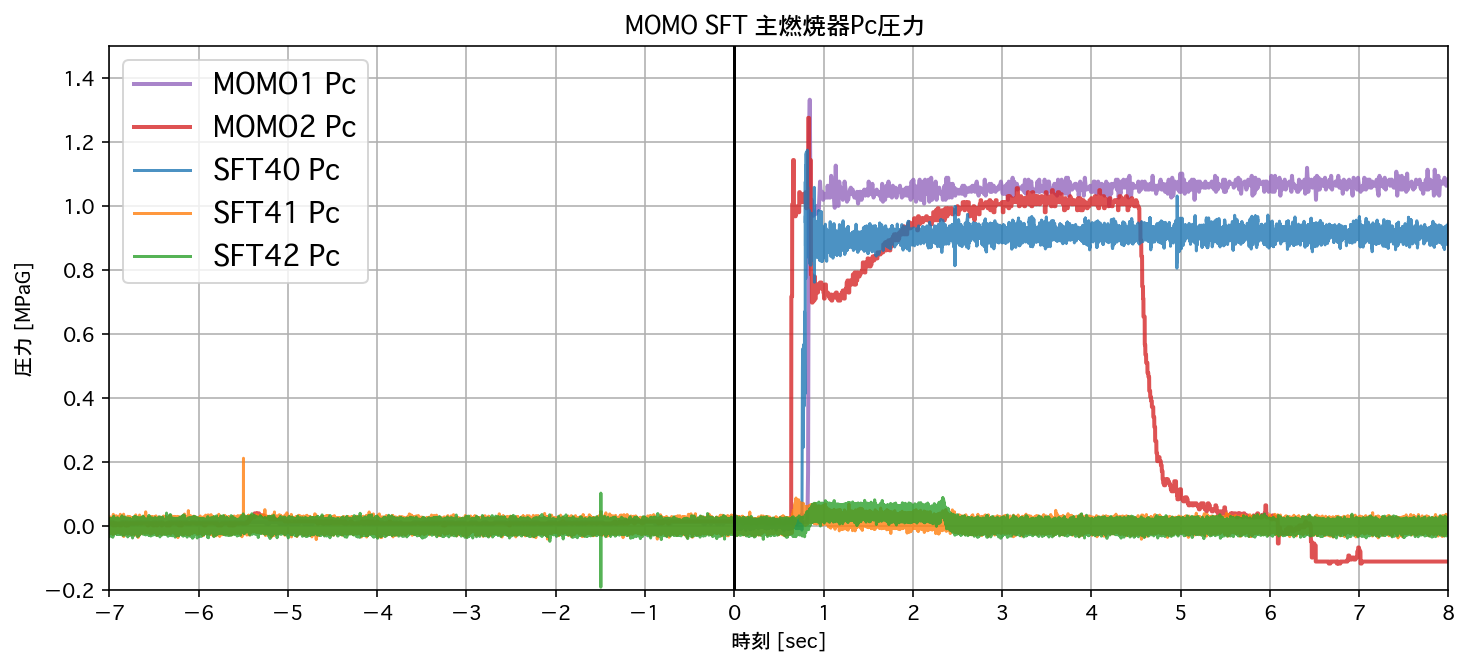

In [141]:
alpha = 0.8
plt.figure()
plt.plot(df_030["# T[s]"], df_030["P4[MPa]"], "C4-", linewidth=2, alpha=alpha, label="MOMO1 Pc")
plt.plot(df1[1], df1[38], "-", color="C3", linewidth=2, alpha=alpha, label="MOMO2 Pc")
plt.plot(df_SFT40["Time"], df_SFT40["Pc"], "C0-", alpha=alpha, label="SFT40 Pc")
plt.plot(df_SFT41["Time"]-10, df_SFT41["Pc"], "C1-", alpha=alpha, label="SFT41 Pc")
plt.plot(df_SFT42["Time"]-10, df_SFT42["Pc"], "C2-", alpha=alpha, label="SFT42 Pc")
plt.grid()
plt.legend(fontsize=14, loc="best")
plt.title("MOMO SFT 主燃焼器Pc圧力 ")
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,10,1))
plt.xlim([-7, 8])
# plt.xlim([-2, 50])
plt.ylim([-0.2, 1.5])
# plt.ylim([-100, 300])
plt.axvline(x=0, color="k")
plt.savefig(savename_SFT  + "Pc_compare" + ".png")
